# 1. Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Carregar os dados

In [73]:
df = pd.read_csv('datagymbox.csv')

# 3. Tratamento de dados

In [74]:
# Verificar valores ausentes
print(df.isnull().sum())  # Verificar a contagem de valores nulos em cada coluna


id           0
mac          0
rssi         0
timestamp    0
dtype: int64


In [75]:
# Remover entradas duplicadas
df = df.drop_duplicates()

In [76]:
# Validar os dados tratados
print(df.head())  # Exibir as primeiras linhas do DataFrame tratado

                                     id                mac  rssi   
0  031c5331-7633-4f8b-bfa6-3605185696e4  00:00:00:08:9a:00   -82  \
1  b06f8d5a-c953-4068-9604-4a47f21e6edb  00:00:00:08:9a:00   -84   
2  3d10a722-f3ca-4329-a5ec-a1885ed5d062  00:00:00:08:9a:00   -83   
3  903bc627-d988-4e9e-a766-c33ffe9dcf01  00:00:00:08:9a:00   -82   
4  1ff1a66c-683d-487a-a8af-b02872fce42d  00:00:00:08:9a:00   -82   

             timestamp  
0  09-05-2023 14:07:40  
1  09-05-2023 14:07:40  
2  09-05-2023 14:07:41  
3  09-05-2023 14:07:41  
4  09-05-2023 14:07:41  


In [77]:
print(df['rssi'].describe())

count    2.825550e+05
mean     1.094971e+05
std      1.402591e+07
min     -1.844794e+09
25%     -8.700000e+01
50%     -8.000000e+01
75%     -7.300000e+01
max      1.920296e+09
Name: rssi, dtype: float64


In [78]:
# Filtrar as entradas com o RSSI fora da faixa entre -100 e 0
df = df[(df['rssi'] >= -70) & (df['rssi'] <= 0)]

# Exibir estatísticas descritivas após a correção
print(df['rssi'].describe())

count    44723.000000
mean       -63.833866
std          8.363317
min        -70.000000
25%        -69.000000
50%        -67.000000
75%        -63.000000
max        -20.000000
Name: rssi, dtype: float64


In [79]:
# Converta a coluna de data e hora para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')

# Crie colunas para a hora do dia e o dia da semana
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day_name()

df_weekdays = df[df['day'] != 'Saturday']
df_saturday = df[df['day'] == 'Saturday']

df_hour_weekdays = df_weekdays.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})
df_hour_saturday = df_saturday.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})

# Agrupe os dados
df_hour = df.groupby('hour').agg({'rssi': 'mean', 'id': 'count'})
df_day = df.groupby('day_of_week').agg({'rssi': 'mean', 'id': 'count'})

print(df_saturday)


                                          id                mac  rssi   
102720  75c3068f-9fb2-4ae9-872a-0bef6343fc78  00:12:7b:25:f5:5d   -70  \
104496  35894036-87e6-4d87-8e19-b1c52c63f42e  00:12:7b:26:19:4e   -70   
104498  c2995ade-df9c-4a01-8742-61f8e7f4067e  00:12:7b:26:19:4e   -69   
104500  0af00204-b489-4f93-9887-389fd1d4c6ef  00:12:7b:26:19:4e   -70   
104501  5945fa21-2d85-4178-b889-53a01294bffb  00:12:7b:26:19:4e   -69   
...                                      ...                ...   ...   
129194  e129e9f9-77ab-4d5d-b329-6b0416eca3bd  fe:d5:37:26:84:1e   -63   
129218  887a4782-d1db-4d24-b223-0f4cacbd5e3b  fe:f7:52:a5:37:83   -56   
129219  dbe9ca44-629c-42dc-a885-b6574d8ab0b5  fe:f7:52:a5:37:83   -58   
129220  3b109d1e-1536-49d6-918c-1d14423111b1  fe:f7:52:a5:37:83   -57   
129221  4ed693be-509a-40da-ab5b-8fc602b2e9a4  fe:f7:52:a5:37:83   -48   

                 timestamp  hour  day_of_week       day  
102720 2023-05-06 17:35:06    17            5  Saturday  
104496 

# 4. Visualização dos dados

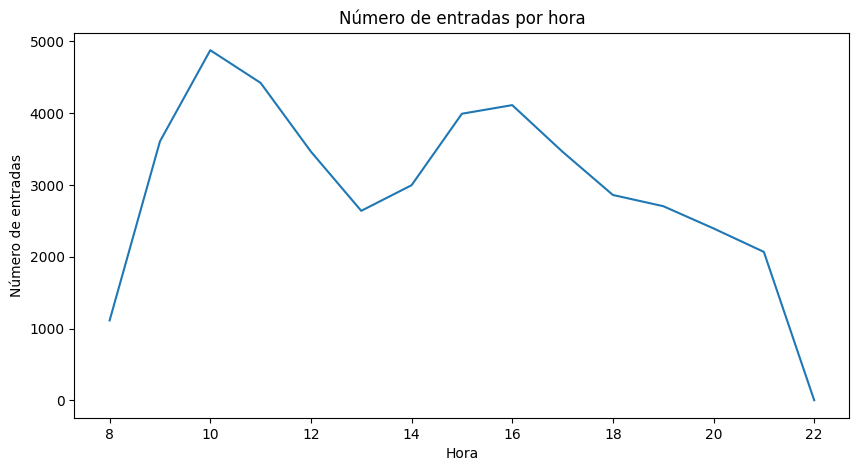

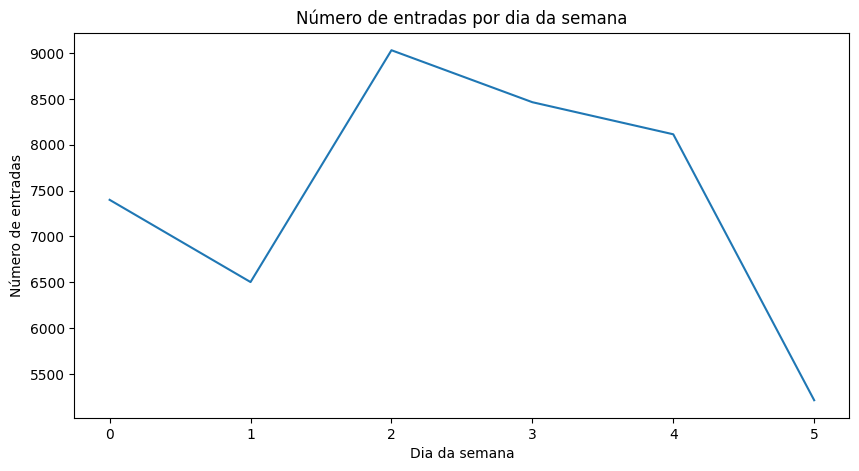

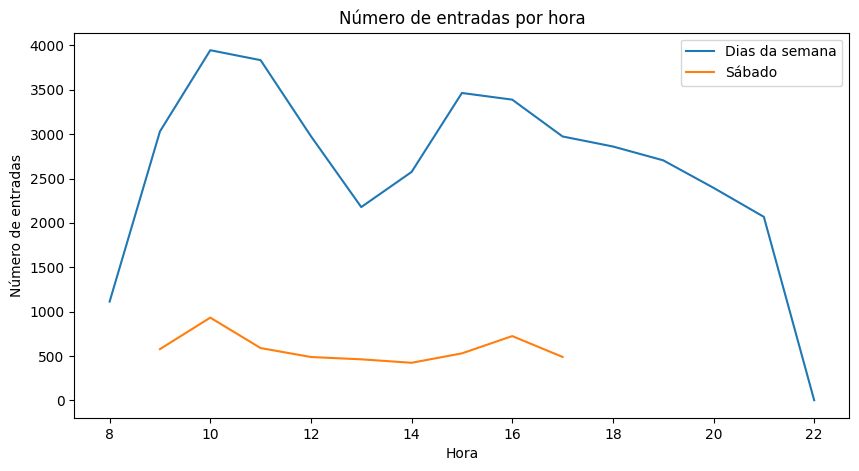

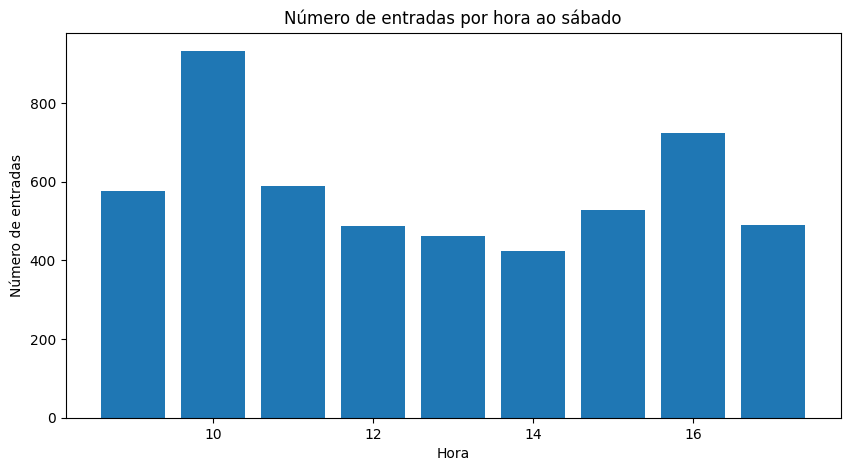

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(df_hour['id'])
plt.title('Número de entradas por hora')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_day['id'])
plt.title('Número de entradas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de entradas')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_hour_weekdays['id'], label='Dias da semana')
plt.plot(df_hour_saturday['id'], label='Sábado')
plt.title('Número de entradas por hora')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.legend()
plt.show()

# Agrupe os dados de sábado por hora e conte o número de entradas
df_hour_saturday = df_saturday.groupby('hour').agg({'id': 'count'})

# Crie o histograma
plt.figure(figsize=(10, 5))
plt.bar(df_hour_saturday.index, df_hour_saturday['id'])
plt.title('Número de entradas por hora ao sábado')
plt.xlabel('Hora')
plt.ylabel('Número de entradas')
plt.show()
